# HW2 Chemical Synapse model

### Constant

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
STEP = 5 #quantum time
V_DEG = 100 #neurotransmitter degradation rate
V_UPTAKE = 1000 #neurotransmitter reuptake rate
# increased membrane potential by a neurotransmitter
V_SPIKE = 30  # Spike potential
U_0, U_2, U_3, U_4 = -70, 0.05, 0.1, 0.13
# probability of creating a neurotransmitter
PR = [0.6, 0.71, 0.97]
R = 1500 
T = 10000  #Time of process
SO = 1000 #initial amount of neurotransmitter molecules
SMAX = 100000 #max amount of neurotransmitter molecules
VO = -70 #initial membrane potential
Vspike = 30 #spike membrane potential

### Chemical synapse simulation

In [3]:
def chemical_synapse(dRel, x, y):
    s = [0] * (int(T / STEP))
    v = [0] * (int(T / STEP))
    activate = 0
    s[0] = SO
    v[0] = VO

    amount = [x, y, 1500-x-y]
    q = [[0, 0, 0] for i in range(int(T / STEP))]

    for t in range(1, int(T/STEP)):
        # calculate s
        s[t] = s[t - 1] + dRel - V_DEG - V_UPTAKE
        
        # calculate probabilities
        for i in range(len(q[0])):
            r = np.random.uniform(size=(amount[i],))
            q[t][i] = np.sum(r < (PR[i] * s[t] / SMAX))

        v[t] = q[t][0] * U_2 + q[t][1] * U_3 + q[t][2] * U_4
        
        if v[t-1] >= V_SPIKE:
            v[t] += VO
            activate += 1
        else:
            v[t] += v[t-1]
    return activate, v, s, q

### Plot results

In [4]:
def plot_results(v, s, q):
    q = list(map(list, zip(*q)))
    t = range(int(T / STEP))
    
    plt.figure(figsize=(15, 10))

    plt.subplot(5, 1, 1)
    plt.ylabel('V(t)')
    plt.plot(t, v)

    plt.subplot(5, 1, 2)
    plt.ylabel('s(t)')
    plt.plot(t, s, 'y', label='m')
    
    
    plt.subplot(5, 1, 3)
    plt.ylabel('q_2(t)')
    plt.plot(t, q[0], 'y')
    
    
    plt.subplot(5, 1, 4)
    plt.ylabel('q_3(t)')
    plt.plot(t, q[1])
    
    
    plt.subplot(5, 1, 5)
    plt.ylabel('q_4(t)')
    plt.plot(t, q[2])
    
    plt.show()

# Experiments

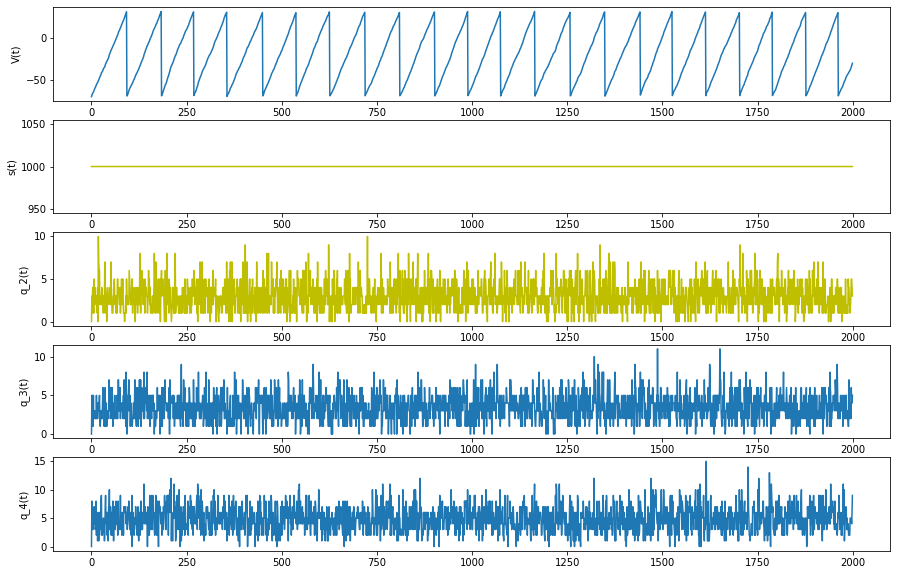

Number of activations:  22


In [7]:
a, v, s, q = chemical_synapse(1100, x = 500, y = 500)
plot_results(v, s, q)
print('Number of activations: ', a)

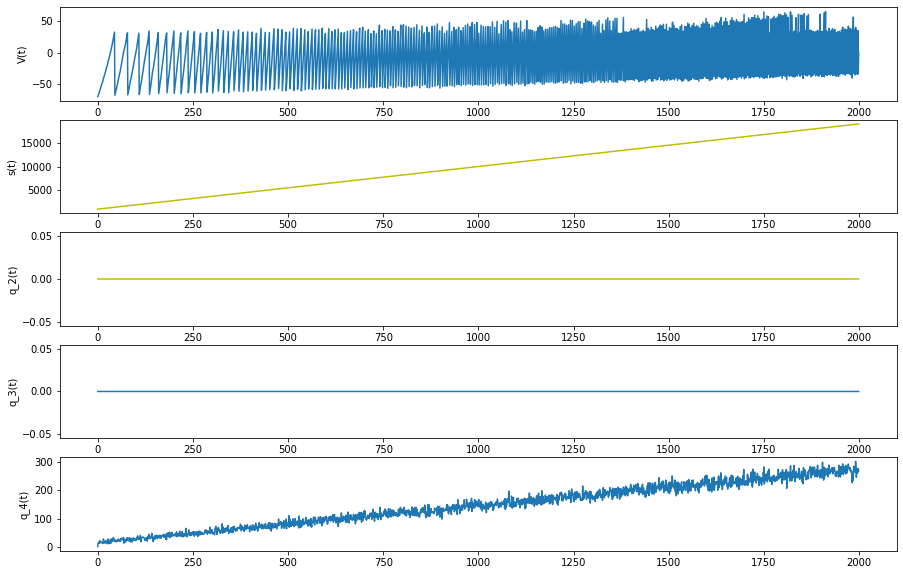

Number of activations:  337


In [5]:
a, v, s, q = chemical_synapse(1109, x = 0, y = 0)
plot_results(v, s, q)
print('Number of activations: ', a)

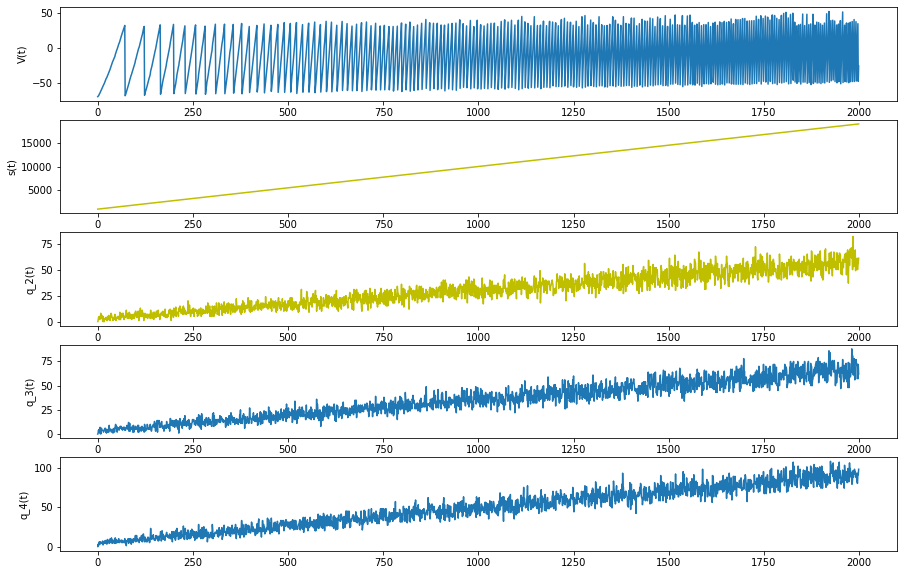

Number of activations:  212


In [6]:
a, v, s, q = chemical_synapse(1109, x = 500, y = 500)
plot_results(v, s, q)
print('Number of activations: ', a)

# Анализ

1. Изменение количество молекул линейное с коэфицентом наклона равным dRel - V_DEG - V_UPTAKE. Соответсвенно, если dRel >  V_DEG - V_UPTAKE, то количество молекул растет, а если значения оказываются равными, то не меняется, количество спаек очень мало потому что нет подряд идущих. 

2. Количество спайек увеличивается при увеличение количество молекул Z и уменьшается приувеличение количества молекул X, в соответсвии с вероятностью возникновения спаек. То есть количество спайков тем больше, чем больше скорость выделения нейромедиатора.